In [2]:
import pandas as pd
import os
import numpy as np
from astropy.visualization import make_lupton_rgb
from astropy.wcs import WCS
from astropy.nddata.utils import Cutout2D
from astropy.coordinates import SkyCoord
import pdb
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.visualization import MinMaxInterval
interval = MinMaxInterval()
from astropy.visualization import AsinhStretch,LogStretch

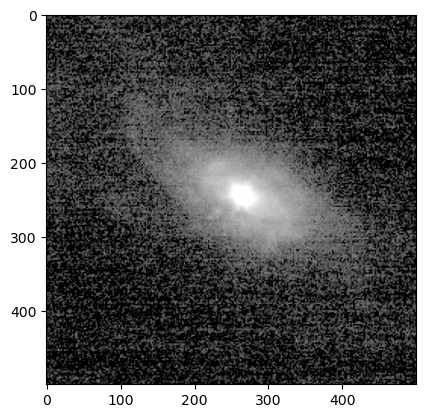

In [130]:
data_path = '/Users/marchuertascompany/Documents/data/Destiny/GO3/'

tng=fits.open(data_path+'0_TNG50.fits')
ceers=fits.open(data_path+'0_F200W_jades.fits')
destiny=fits.open(data_path+'0_F200W_destiny+jades.fits')


cutout_size=250

tng_lupton = make_lupton_rgb(tng[0].data[9,int(tng[0].data.shape[1]/2-cutout_size/3):int(tng[0].data.shape[1]/2+cutout_size/3),int(tng[0].data.shape[2]/2-cutout_size/3):int(tng[0].data.shape[2]/2+cutout_size/3)]/np.max(tng[0].data[9,:,:]), tng[0].data[9,int(tng[0].data.shape[1]/2-cutout_size/3):int(tng[0].data.shape[1]/2+cutout_size/3),int(tng[0].data.shape[2]/2-cutout_size/3):int(tng[0].data.shape[2]/2+cutout_size/3)]/np.max(tng[0].data[9,:,:]), tng[0].data[9,int(tng[0].data.shape[1]/2-cutout_size/3):int(tng[0].data.shape[1]/2+cutout_size/3),int(tng[0].data.shape[2]/2-cutout_size/3):int(tng[0].data.shape[2]/2+cutout_size/3)]/np.max(tng[0].data[9,:,:]),Q=6, stretch=0.0005)

#ceers_lupton = make_lupton_rgb(ceers[1].data/np.max(ceers[1].data), ceers[1].data/np.max(ceers[1].data), ceers[1].data/np.max(ceers[1].data),Q=0, stretch=0.00015)

ceers_lupton = make_lupton_rgb(ceers[1].data[int(ceers[1].data.shape[0]/2-cutout_size):int(ceers[1].data.shape[0]/2+cutout_size),int(ceers[1].data.shape[1]/2-cutout_size):int(ceers[1].data.shape[1]/2+cutout_size)]/np.max(ceers[1].data), ceers[1].data[int(ceers[1].data.shape[0]/2-cutout_size):int(ceers[1].data.shape[0]/2+cutout_size),int(ceers[1].data.shape[1]/2-cutout_size):int(ceers[1].data.shape[1]/2+cutout_size)]/np.max(ceers[1].data), ceers[1].data[int(ceers[1].data.shape[0]/2-cutout_size):int(ceers[1].data.shape[0]/2+cutout_size),int(ceers[1].data.shape[1]/2-cutout_size):int(ceers[1].data.shape[1]/2+cutout_size)]/np.max(ceers[1].data),Q=6, stretch=0.0005)

destiny_lupton = make_lupton_rgb(destiny[1].data[int(destiny[1].data.shape[0]/2-cutout_size):int(destiny[1].data.shape[0]/2+cutout_size),int(destiny[1].data.shape[1]/2-cutout_size):int(destiny[1].data.shape[1]/2+cutout_size)]/np.max(destiny[1].data), destiny[1].data[int(destiny[1].data.shape[0]/2-cutout_size):int(destiny[1].data.shape[0]/2+cutout_size),int(destiny[1].data.shape[1]/2-cutout_size):int(destiny[1].data.shape[1]/2+cutout_size)]/np.max(destiny[1].data), destiny[1].data[int(destiny[1].data.shape[0]/2-cutout_size):int(destiny[1].data.shape[0]/2+cutout_size),int(destiny[1].data.shape[1]/2-cutout_size):int(destiny[1].data.shape[1]/2+cutout_size)]/np.max(destiny[1].data),Q=6, stretch=0.0005)

plt.imshow(ceers_lupton)
plt.imshow(destiny_lupton)

#nir_f200 = fits.open(data_path + "images/hlsp_ceers_jwst_nircam_nircam" + str(c) + "_" + wl + "_dr0.5_i2d.fits.gz")

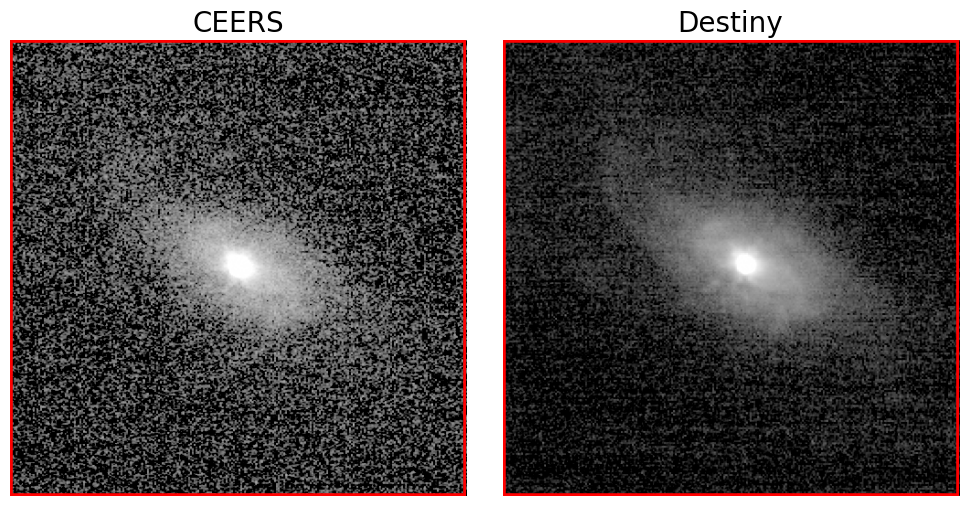

In [95]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from astropy.io import fits
from astropy.visualization import make_lupton_rgb

# Your existing code for reading data and making lupton images...

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot CEERS image
axs[0].imshow(ceers_lupton)
axs[0].axis('off')
axs[0].set_title("CEERS", fontsize=20)
rect = Rectangle((0,0), 1, 1, linewidth=4, edgecolor='red', facecolor='none', transform=axs[0].transAxes)
axs[0].add_patch(rect)

# Plot Destiny image
axs[1].imshow(destiny_lupton)
axs[1].axis('off')
axs[1].set_title("Destiny", fontsize=20)
rect = Rectangle((0,0), 1, 1, linewidth=4, edgecolor='red', facecolor='none', transform=axs[1].transAxes)
axs[1].add_patch(rect)

plt.tight_layout()
plt.show()


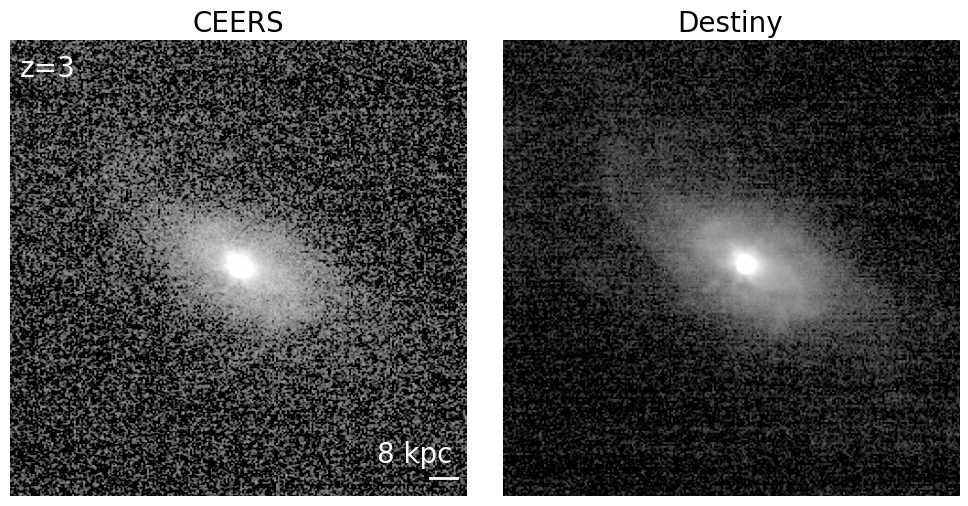

In [112]:
import matplotlib.pyplot as plt
import numpy as np

# ... [Your code to read and process the images]

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Display CEERS
ax[0].imshow(ceers_lupton, cmap='gray')
ax[0].set_title('CEERS', fontsize=20)
ax[0].axis('off')
ax[0].annotate('z=3', (10, 40), color='white', fontsize=20)

# Draw the ruler
ruler_length = 30  # in pixels
x_end = ceers_lupton.shape[1] - 10
x_start = x_end - ruler_length
y_position = ceers_lupton.shape[0] - 20
ax[0].plot([x_start, x_end], [y_position, y_position], color='white', linewidth=2)
ax[0].annotate('8 kpc', (x_end - 5, y_position - 10), color='white', fontsize=20, ha='right', va='bottom')

# Display Destiny
ax[1].imshow(destiny_lupton, cmap='gray')
ax[1].set_title('Destiny', fontsize=20)
ax[1].axis('off')

# Adjusting the layout
plt.tight_layout()

# Displaying the border
for axis in ax:
    for spine in axis.spines.values():
        spine.set_edgecolor('red')
        spine.set_linewidth(4)

plt.show()


/var/folders/3b/tyyj2qy12lxcqm59_rgl14bh0000gn/T/ipykernel_35044/681356489.py:41: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


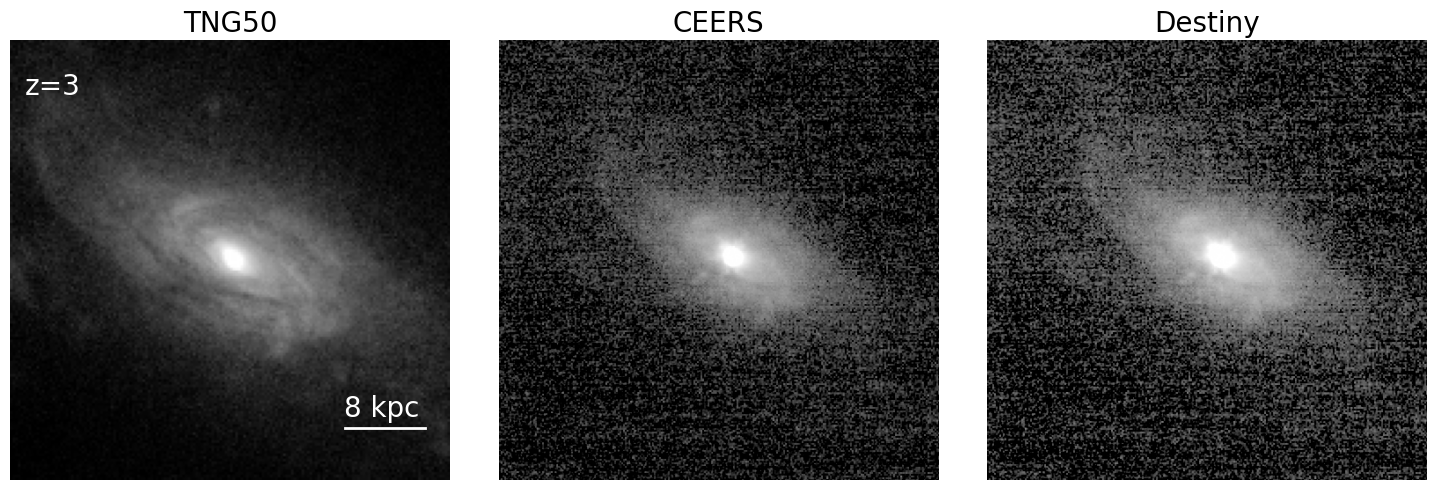

In [131]:
import matplotlib.pyplot as plt
import numpy as np

# ... [Your code to read and process the images]

fig, ax = plt.subplots(1, 3, figsize=(15, 5))  # Adjusted for three panels

# Display TNG50
ax[0].imshow(tng_lupton, cmap='gray')
ax[0].set_title('TNG50', fontsize=20)
ax[0].axis('off')

# Display CEERS
ax[1].imshow(ceers_lupton, cmap='gray')
ax[1].set_title('CEERS', fontsize=20)
ax[1].axis('off')
ax[0].annotate('z=3', (5, 20), color='white', fontsize=20)

# Draw the ruler
ruler_length = 30  # in pixels
x_end = tng_lupton.shape[1] - 10
x_start = x_end - ruler_length
y_position = tng_lupton.shape[0] - 20
ax[0].plot([x_start, x_end], [y_position, y_position], color='white', linewidth=2)
ax[0].annotate('8 kpc', (x_end - 2, y_position - 2), color='white', fontsize=20, ha='right', va='bottom')

# Display Destiny
ax[2].imshow(destiny_lupton, cmap='gray')
ax[2].set_title('Destiny', fontsize=20)
ax[2].axis('off')

# Adjusting the layout
plt.tight_layout()

# Displaying the border
for axis in ax:
    for spine in axis.spines.values():
        spine.set_edgecolor('red')
        spine.set_linewidth(4)

plt.tight_layout()
plt.savefig(data_path+'destiny_LSB.png')
plt.show()



In [111]:
from astropy.cosmology import Planck15
from astropy import units as u

# Define the redshift and angle
z = 3
angle_rad = angle.to(u.rad)

# Calculate the transverse separation in Mpc/rad
dA = Planck15.angular_diameter_distance(z)

# Multiply the angle in radians with the angular diameter distance
separation_Mpc = angle_rad * dA

# Convert the separation to physical units at the given redshift
separation_kpc = separation_Mpc.to(u.kpc, equivalencies=u.dimensionless_angles())

print(f"Physical distance of {angle} at z={z} is approximately {separation_kpc:.2f}")


Physical distance of 1.0 arcsec at z=3 is approximately 7.89 kpc


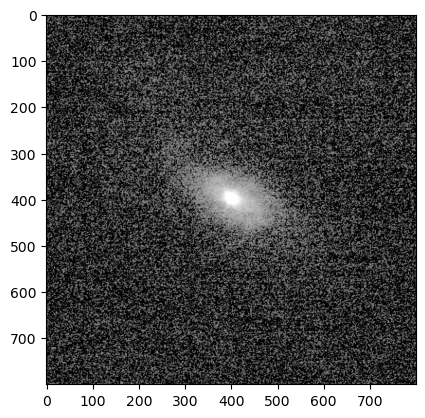

In [78]:
plt.imshow(ceers_lupton)

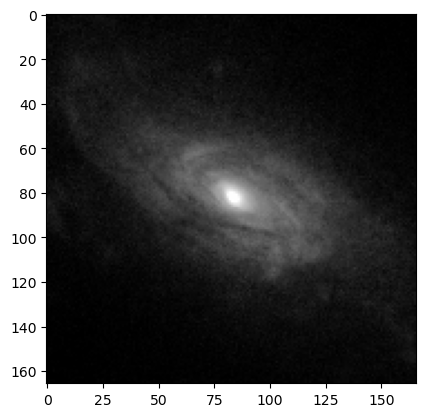

In [100]:
plt.imshow(tng_lupton)

In [80]:
print(tng[0].header)

SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -32 / array data type                                NAXIS   =                    3 / number of array dimensions                     NAXIS1  =                  691                                                  NAXIS2  =                  691                                                  NAXIS3  =                   12                                                  DATE    = '2021-07-28T22:54:35' / Date and time of creation (UTC)               ORIGIN  = 'SKIRT simulation'   / Astronomical Observatory, Ghent University     OBSERVER= 'Luca Costantin'                                                      TARGET  =                    0 / ID from Illustris TNG50-1                      REDSHIFT=                    3 / Redshift                                       AZIMUTH =                    0 / Azimuth of the telescope in skirt              INCLIN  =                    0 / Inclina

In [85]:
print(int(tng[0].data.shape[1]/2-cutout_size))

-54


In [86]:
print(tng[0].data.shape)

(12, 691, 691)
